In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [ ]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} sklearn

In [2]:
import sklearn
print(sklearn.__version__)

0.20.3


In [2]:
import pandas as pd

def load_passengers_data(passengers_path = os.path.join("datasets", "Titanic passengers")):
    csv_path_train = os.path.join(passengers_path, "train.csv")
    csv_path_test = os.path.join(passengers_path, "test.csv")
    csv_path_gender_submission = os.path.join(passengers_path, "gender_submission.csv")
    return pd.read_csv(csv_path_train), pd.read_csv(csv_path_test), pd.read_csv(csv_path_gender_submission)

In [3]:
pass_train, pass_test, pass_gender_submission = load_passengers_data()

In [5]:
pass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
pass_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
pass_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
pass_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


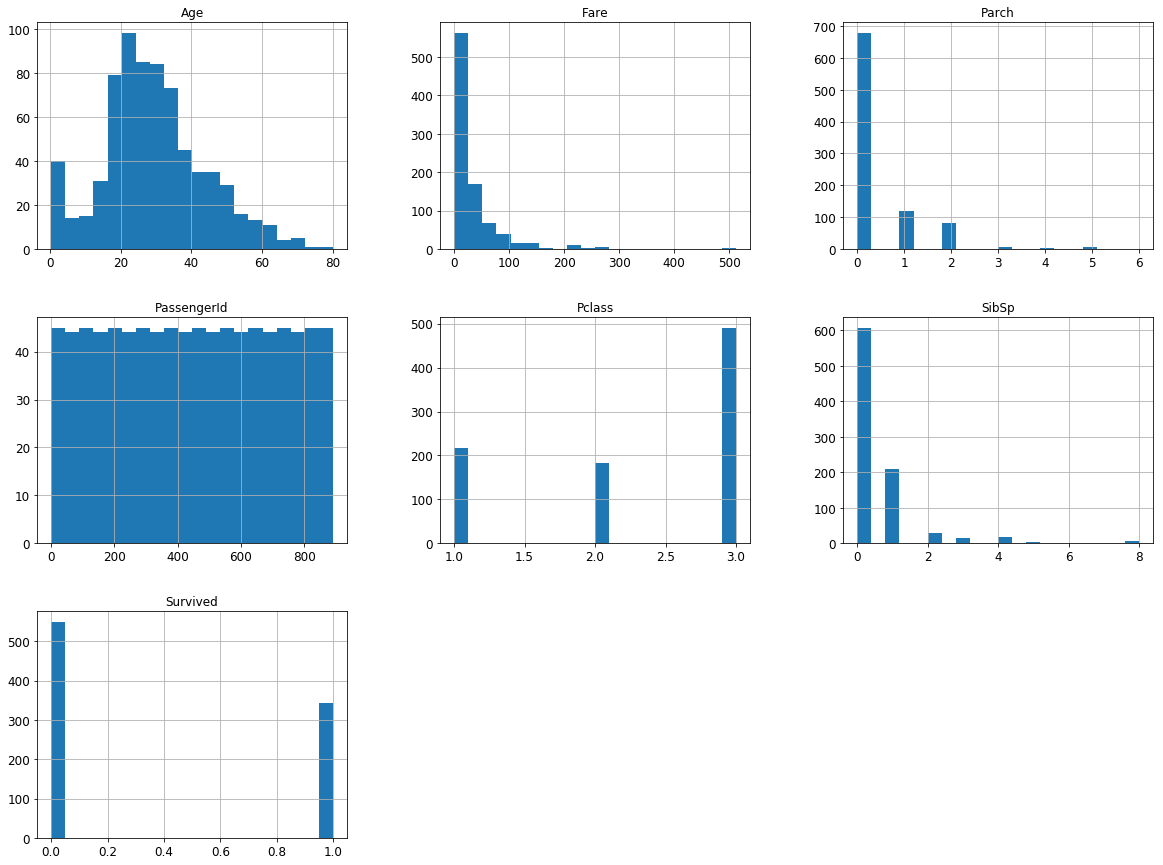

In [9]:
pass_train.hist(bins=20,figsize=(20,15))
plt.show()

In [10]:
corr_matrix = pass_train.corr()

In [11]:
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [4]:
pass_train_set = pass_train.drop(["PassengerId","Name","Ticket","Survived"], axis =1)
pass_train_set["Cabin"] = (pass_train_set["Cabin"] == pass_train_set["Cabin"])*1
pass_train_set["Sex"] = (pass_train_set["Sex"] == "female")*1
pass_labels = pass_train["Survived"]
# Sex: 0 = male, 1 = female
# Cabin: 0 = NaN, 1 = else

In [6]:
pass_train_set[:10]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,22.0,1,0,7.2500,0,S
1,1,1,38.0,1,0,71.2833,1,C
2,3,1,26.0,0,0,7.9250,0,S
3,1,1,35.0,1,0,53.1000,1,S
4,3,0,35.0,0,0,8.0500,0,S
5,3,0,NaN,0,0,8.4583,0,Q
6,1,0,54.0,0,0,51.8625,1,S
7,3,0,2.0,3,1,21.0750,0,S
8,3,1,27.0,0,2,11.1333,0,S
9,2,1,14.0,1,0,30.0708,0,C


In [7]:
print(type(pass_labels))
pass_labels[:10]

<class 'pandas.core.series.Series'>


0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [8]:
pass_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null int64
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [5]:
num_attribs = list(pass_train_set)
num_attribs.remove("Pclass")
num_attribs.remove("Embarked")
num_attribs.remove("Sex")
num_attribs.remove("Cabin")
cat_attribs = ["Pclass","Embarked"]
binary_attribs = ["Sex","Cabin"]

In [6]:
print(num_attribs, cat_attribs, binary_attribs)

['Age', 'SibSp', 'Parch', 'Fare'] ['Pclass', 'Embarked'] ['Sex', 'Cabin']


In [18]:
import sys
!{sys.executable} -m pip install sklearn-pandas

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


In [8]:
from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
from sklearn.base import TransformerMixin

class CustomImputer(TransformerMixin):
    def __init__(self, cols=None, strategy='mean'):
        self.cols = cols
        self.strategy = strategy

    def transform(self, df):
        X = df.copy()
        impute = SimpleImputer(strategy=self.strategy)
        if self.cols == None:
                self.cols = list(X.columns)
        for col in self.cols:
                if X[col].dtype == np.dtype('O') : 
                        X[col].fillna(X[col].value_counts().index[0], inplace=True)
                else : X[col] = impute.fit_transform(X[[col]])

        return X

    def fit(self, *_):
        return self

In [9]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Scikit-Learn 0.20+
from sklearn_pandas import CategoricalImputer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("imputer", DataFrameImputer()),
    ("one_hot_encoder", OneHotEncoder()),
])

binary_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
])

In [10]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
        ("binary", binary_pipeline, binary_attribs),
    ])

In [11]:
pass_train_prepared = full_pipeline.fit_transform(pass_train_set)
print(type(pass_train_prepared), pass_train_prepared.shape)

<class 'numpy.ndarray'> (891, 12)


In [16]:
pass_train_prepared[:3]

array([[-0.56573646,  0.43279337, -0.47367361, -0.50244517,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 0.66386103,  0.43279337, -0.47367361,  0.78684529,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, -0.48885426,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ]])

In [17]:
# test set prepared

In [12]:
pass_test_set = pass_test.drop(["PassengerId","Name","Ticket"], axis =1)
pass_test_set["Cabin"] = (pass_test_set["Cabin"] == pass_test_set["Cabin"])*1
pass_test_set["Sex"] = (pass_test_set["Sex"] == "female")*1
# Sex: 0 = male, 1 = female
# Cabin: 0 = NaN, 1 = else

In [13]:
pass_test_prepared = full_pipeline.fit_transform(pass_test_set)

In [14]:
X_train = np.copy(pass_train_prepared)
y_train = np.array(pass_labels)
#y_train = np.array(pass_labels.astype(np.float64))
X_test = np.copy(pass_test_prepared)

In [21]:
X_train[:5], y_train[:5]

(array([[-0.56573646,  0.43279337, -0.47367361, -0.50244517,  0.        ,
          0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ],
        [ 0.66386103,  0.43279337, -0.47367361,  0.78684529,  1.        ,
          0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
          1.        ,  1.        ],
        [-0.25833709, -0.4745452 , -0.47367361, -0.48885426,  0.        ,
          0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
          1.        ,  0.        ],
        [ 0.4333115 ,  0.43279337, -0.47367361,  0.42073024,  1.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          1.        ,  1.        ],
        [ 0.4333115 , -0.4745452 , -0.47367361, -0.48633742,  0.        ,
          0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ]]), array([0, 1, 1, 1, 0]))

In [22]:
X_test[:3]

array([[ 0.38623105, -0.49947002, -0.4002477 , -0.49741333,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.37137004,  0.61699237, -0.4002477 , -0.51227801,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ],
       [ 2.55353683, -0.49947002, -0.4002477 , -0.46410047,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ]])

In [31]:
# model training

In [32]:
# RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import accuracy_score

y_predict_forest = forest_clf.predict(X_train)
accuracy_score(y_train, y_predict_forest) 

0.9685746352413019

In [17]:
from sklearn.model_selection import cross_val_score, cross_val_predict

cross_val_score(forest_clf, X_train, y_train, cv=5, scoring="accuracy")

#y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")

array([0.79329609, 0.78212291, 0.84269663, 0.79775281, 0.81920904])

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=5)
print(precision_score(y_train, y_train_pred_forest),
recall_score(y_train, y_train_pred_forest))

0.7689873417721519 0.7105263157894737


In [37]:
y_train_pred_forest[-10:]

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [7, 8, 9, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [7, 8, 9, 10]},
]

grid_search_forest = GridSearchCV(forest_clf,param_grid,cv=5, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_forest.fit(X_train,y_train)

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [7, 8, 9, 10]}, {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [39]:
grid_search_forest.best_params_

{'max_features': 8, 'n_estimators': 10}

In [40]:
best_forest_clf = grid_search_forest.best_estimator_

In [41]:
y_train_pred_forest = cross_val_predict(best_forest_clf, X_train, y_train, cv=5)
print(precision_score(y_train, y_train_pred_forest),
      recall_score(y_train, y_train_pred_forest), 
      f1_score(y_train, y_train_pred_forest),
      accuracy_score(y_train, y_train_pred_forest))

0.7929936305732485 0.7280701754385965 0.7591463414634146 0.8226711560044894


In [43]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train,y_train_pred_forest)
conf_mx

array([[484,  65],
       [ 93, 249]])

In [44]:
# KNN classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_train)
accuracy_score(y_train,y_pred_knn)

0.8540965207631874

In [46]:
y_train_pred_knn = cross_val_predict(knn_clf, X_train, y_train, cv=5, n_jobs=-1)

In [47]:
print(precision_score(y_train, y_train_pred_knn),
      recall_score(y_train, y_train_pred_knn), 
      f1_score(y_train, y_train_pred_knn),
      accuracy_score(y_train, y_train_pred_knn))

0.7515923566878981 0.6900584795321637 0.7195121951219513 0.7934904601571269


In [48]:
# SGD classifier

In [49]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=5)

In [50]:
print(precision_score(y_train, y_train_pred_sgd),
      recall_score(y_train, y_train_pred_sgd), 
      f1_score(y_train, y_train_pred_sgd),
      accuracy_score(y_train, y_train_pred_sgd))

0.6265356265356266 0.7456140350877193 0.6809078771695595 0.7317620650953984


In [23]:
# SVM classifier

In [31]:
from sklearn.svm import LinearSVC

simple_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=0.1,loss="hinge")),
])

y_train_pred_simple_svm = cross_val_predict(simple_svm_clf, X_train, y_train, cv=5)

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
accuracy_score(y_train,y_train_pred_simple_svm)

0.7878787878787878

In [19]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree = 3, coef0 = 1, C=5)),
])

y_train_pred_poly_kernel_svm = cross_val_predict(poly_kernel_svm_clf, X_train, y_train, cv=5)

In [20]:
accuracy_score(y_train,y_train_pred_poly_kernel_svm)

0.8024691358024691

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'degree': [3,4], 'coef0': [0.03,0.1,0.3], 'C': [1,3,5]},
]

poly_svm_clf = SVC(kernel="poly", coef0 = 1, gamma = 'auto')

grid_search_svm = GridSearchCV(poly_svm_clf, param_grid, cv=5, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_svm.fit(X_train,y_train)
grid_search_svm.best_estimator_

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=3, cache_size=200, class_weight=None, coef0=0.1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
best_svm_clf = grid_search_svm.best_estimator_
y_train_pred_svm = cross_val_predict(best_svm_clf, X_train, y_train, cv=5)
print(precision_score(y_train, y_train_pred_svm),
      recall_score(y_train, y_train_pred_svm), 
      f1_score(y_train, y_train_pred_svm),
      accuracy_score(y_train, y_train_pred_svm))

0.8172757475083057 0.7192982456140351 0.7651632970451011 0.8305274971941639


In [51]:
# Final prediction on test set

In [ ]:
pass_gender_submission[:3]

In [53]:
pass_test["PassengerId"][:3]

0    892
1    893
2    894
Name: PassengerId, dtype: int64

In [54]:
y_test_predict = best_forest_clf.predict(X_test)

In [55]:
y_test_predict[:3]

array([0, 0, 0])

In [56]:
join = list(zip(pass_test["PassengerId"],y_test_predict))

In [57]:
join[:3]

[(892, 0), (893, 0), (894, 0)]

In [58]:
prediction = pd.DataFrame(join,columns=["PassengerId","Survived"])

In [59]:
prediction[10:15]

,PassengerId,Survived
10,902,0
11,903,0
12,904,1
13,905,0
14,906,1


In [60]:
prediction.to_csv("datasets/Titanic passengers/titanic_prediction.csv", encoding='utf-8', index=False)

In [61]:
titanic_predictions = pd.read_csv("datasets/Titanic passengers/titanic_prediction.csv")

In [62]:
titanic_predictions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [63]:
len(titanic_predictions)

418

In [37]:
y_test_predict_svm = best_svm_clf.predict(X_test)

In [38]:
y_test_predict_svm[:3]

array([0, 1, 0])

In [39]:
join_svm = list(zip(pass_test["PassengerId"],y_test_predict_svm))
prediction_svm = pd.DataFrame(join_svm,columns=["PassengerId","Survived"])
prediction_svm.to_csv("datasets/Titanic passengers/titanic_prediction_svm.csv", encoding='utf-8', index=False)

In [40]:
titanic_predictions_svm = pd.read_csv("datasets/Titanic passengers/titanic_prediction_svm.csv")
titanic_predictions_svm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
